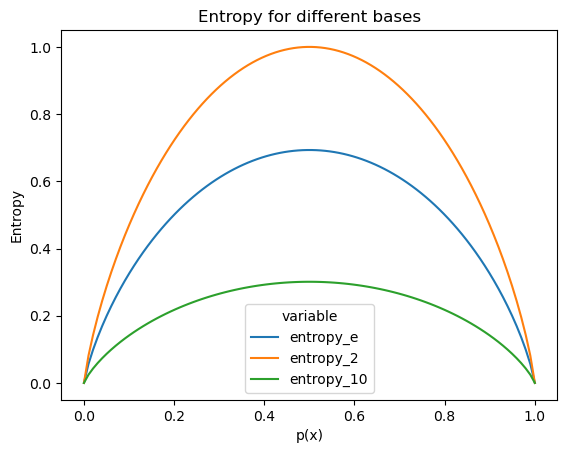

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def entropy(px, base):
    """
    px : array like
    """
    # ログのベースによって、np.log、np.log2、np.log10を選択
    if base=="e":
        log = np.log
    elif base=="2":
        log = np.log2
    elif base=="10":
        log = np.log10
    
    px = np.array(px).astype(float)
    px[px==0] = 1e-10 #log(0)は計算できないため、小さな値に置き換えておく
    return -1 * np.sum(px*log(px)) # エントロピーの定義に従って計算

p_list = np.linspace(0, 1, 100) # 確率pを0から1まで100個生成
ent_e =  np.zeros(len(p_list))
ent_2 =  np.zeros(len(p_list))
ent_10 =  np.zeros(len(p_list))

for i, p in enumerate(p_list):
    # それぞれのベースでのエントロピーを計算
    ent_e[i] = entropy(np.array([p, 1 - p]), base="e")
    ent_2[i] = entropy(np.array([p, 1 - p]), base="2")
    ent_10[i] = entropy(np.array([p, 1 - p]), base="10")    

# データフレームを作成
df = pd.DataFrame({
    "p(x)": p_list,
    "entropy_e": ent_e,
    "entropy_2": ent_2,
    "entropy_10": ent_10
})

# エントロピーをプロット
sns.lineplot(x="p(x)", y="value", hue="variable", data=pd.melt(df, ["p(x)"]))
plt.title("Entropy for different bases")
plt.ylabel("Entropy")
plt.show()
